In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=dc82e3ea3467a7efa05252ff7340bd397f77dba5e57d970ee942101e64866ebb
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
!pip install opendatasets








Loading the dataset


In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashgautam321
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:27<00:00, 105MB/s]


In [ ]:
train = "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
validation_dir = "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
import glob
import os
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train)
num_classes=len(glob.glob(train+"/*"))
test_samples=get_files(validation_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
70295 Train images
17572 Test images


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
img_width,img_height =224,224
input_shape=(img_width,img_height,3)
batch_size =64
train_generator =train_datagen.flow_from_directory(train,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(validation_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Input((224, 224, 3)),

    layers.Conv2D(16, 3, activation="relu"),
    layers.BatchNormalization(), # Regularization
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2), # Regularization
    layers.Dense(38, activation="softmax"),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
history = model.fit(train_generator,validation_data=test_generator,epochs=2,shuffle=True)

Epoch 1/2
1099/1099 [==============================] - 6095s 6s/step - loss: 0.5844 - accuracy: 0.8339 - val_loss: 1.2874 - val_accuracy: 0.6481
Epoch 2/2
1099/1099 [==============================] - 6115s 6s/step - loss: 0.2969 - accuracy: 0.9103 - val_loss: 0.5511 - val_accuracy: 0.8456


In [ ]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

275/275 [==============================] - 404s 1s/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.02      0.02       504
                                 Apple___Black_rot       0.03      0.06      0.04       497
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       440
                                   Apple___healthy       0.03      0.03      0.03       502
                               Blueberry___healthy       0.01      0.01      0.01       454
          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       421
                 Cherry_(including_sour)___healthy       0.03      0.03      0.03       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477
               Corn_(ma

In [ ]:
model.save('CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing

In [ ]:
img='/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823_180deg.JPG'

In [ ]:
import cv2
def predict_disease(test_image):
  img = cv2.imread(test_image)
  img = img / 255.0
  img = cv2.resize(img, (224, 224))
  img = img.reshape(1,224,224,3)
  prediction = model.predict(img)
  pred_class = np.argmax(prediction, axis = -1)
  return pred_class

In [ ]:
pred = predict_disease(img)

1/1 [==============================] - 1s 689ms/step


In [ ]:
d = pred[0]

In [ ]:
d

31

In [ ]:
Plant_disease = [  'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy',
                 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                   'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
                   'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)',
                   'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
                   'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
                   'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
                   'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
                   'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',  'Tomato___healthy']

In [ ]:
print(len(Plant_disease))
# Plant_disease[d]

38


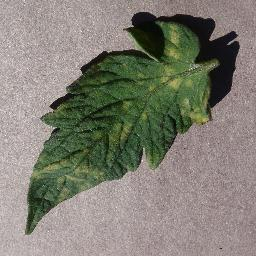

In [ ]:
from IPython.display import Image

# # Upload your image file to Colab
# uploaded = files.upload()

# # Get the file name
# file_name = next(iter(uploaded))

# # Display the image
Image(img)